In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [2]:
with open('Intent.json') as f:
         data=json.load(f)

In [3]:
tag=[]
inputs=[]
responses={}
for intent in data['intents']:
    responses[intent['intent']]=intent['responses']
    for values in intent['text']:
        inputs.append(values)
        tag.append(intent['intent'])

In [4]:
df = pd.DataFrame(
    data = {'input': inputs, 'tag': tag}
)

df[40:50]

,input,tag
40,What do your friends call you?,NameQuery
41,Who are you?,NameQuery
42,Tell me your name?,NameQuery
43,What is your real name?,RealNameQuery
44,What is your real name please?,RealNameQuery
45,What's your real name?,RealNameQuery
46,Tell me your real name?,RealNameQuery
47,Your real name?,RealNameQuery
48,Your real name please?,RealNameQuery
49,Your real name please?,RealNameQuery


In [5]:
df.isnull().sum()

input    0
tag      0
dtype: int64

In [6]:
#removing punctuations
df['input'] = df['input'].str.replace(r'[^\w\s]+', '')

df[45:50]

C:\Users\Sami\AppData\Local\Temp\ipykernel_5312\12761628.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['input'] = df['input'].str.replace(r'[^\w\s]+', '')


,input,tag
45,Whats your real name,RealNameQuery
46,Tell me your real name,RealNameQuery
47,Your real name,RealNameQuery
48,Your real name please,RealNameQuery
49,Your real name please,RealNameQuery


In [7]:
#tokenizer
tokenizer = Tokenizer(
    num_words=2000
)
tokenizer.fit_on_texts(
    df['input']
)
train_data = tokenizer.texts_to_sequences(
     df['input']
)

In [8]:
#padding
x_train=pad_sequences(train_data)
x_train

array([[ 0,  0,  0, ...,  0,  0, 48],
       [ 0,  0,  0, ...,  0, 48, 49],
       [ 0,  0,  0, ...,  0,  0, 63],
       ...,
       [ 0, 10,  1, ..., 79, 80, 13],
       [ 0, 10,  1, ..., 16, 62, 13],
       [ 0,  0,  0, ..., 61, 16, 62]])

In [9]:
#Encoding Outputs
le = LabelEncoder()
y_train=le.fit_transform(df['tag'])

y_train

array([ 7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  2,  2,
        2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4, 10, 10, 10, 10, 10, 10, 14, 14, 14, 14, 14, 14, 14, 19,
       19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 11, 11, 11, 11, 11,
       11, 11, 20, 20, 20, 20, 20, 20, 16, 16, 16, 16, 16, 16, 16, 17, 17,
       17, 17,  5,  5,  5,  5,  1,  1,  1,  1,  1,  1, 21, 21, 21, 21, 21,
       21,  0,  0,  0,  0,  0,  0,  0,  6,  6,  6,  6,  6,  6,  9,  9,  9,
        9,  9,  9, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13,
       15, 15, 15, 15, 15, 15, 15])

In [10]:
vocabulary = len(tokenizer.word_index)
print('unique words=',vocabulary)

input_shape=x_train.shape[1]
print('input_shape=',input_shape)

output_shape=le.classes_.shape[0]
print('output_shape=',output_shape)

unique words= 117
input_shape= 9
output_shape= 22


In [11]:
#Creating Model
input_data =  tf.keras.layers.Input(shape=input_shape,name='input_data ')
x = tf.keras.layers.Embedding(vocabulary+1,10)(input_data)
x=tf.keras.layers.LSTM(10,return_sequences=True)(x)
x=tf.keras.layers.Flatten()(x)
output=tf.keras.layers.Dense(output_shape,activation='softmax')(x)

model = tf.keras.Model(input_data,output)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_data  (InputLayer)    [(None, 9)]               0         
                                                                 
 embedding (Embedding)       (None, 9, 10)             1180      
                                                                 
 lstm (LSTM)                 (None, 9, 10)             840       
                                                                 
 flatten (Flatten)           (None, 90)                0         
                                                                 
 dense (Dense)               (None, 22)                2002      
                                                                 
Total params: 4,022
Trainable params: 4,022
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
5/5 [==============================] - 4s 12ms/step - loss: 3.0920 - accuracy: 0.0280
Epoch 2/200
5/5 [==============================] - 0s 12ms/step - loss: 3.0887 - accuracy: 0.0769
Epoch 3/200
5/5 [==============================] - 0s 12ms/step - loss: 3.0863 - accuracy: 0.1119
Epoch 4/200
5/5 [==============================] - 0s 12ms/step - loss: 3.0836 - accuracy: 0.1608
Epoch 5/200
5/5 [==============================] - 0s 10ms/step - loss: 3.0810 - accuracy: 0.1538
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 3.0781 - accuracy: 0.1818
Epoch 7/200
5/5 [==============================] - 0s 12ms/step - loss: 3.0748 - accuracy: 0.2308
Epoch 8/200
5/5 [==============================] - 0s 12ms/step - loss: 3.0709 - accuracy: 0.2238
Epoch 9/200
5/5 [==============================] - 0s 12ms/step - loss: 3.0665 - accuracy: 0.2238
Epoch 10/200
5/5 [==============================] - 0s 14ms/step - loss: 3.0617 - accuracy: 0.2308
Epoch 11/200
5/5 [=

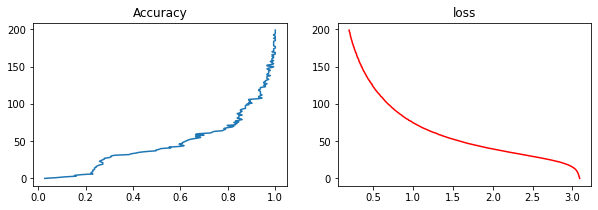

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(history.history['accuracy'],range(200))
plt.subplot(1,2,2)
plt.title('loss')
plt.plot(history.history['loss'],range(200),color='red')
plt.show()

In [14]:
import random
import cv2
count=0
while True:
    text_p=[]
  
    predict = input('You :')
    name=predict.split(' ')[-1]
    predict = predict.replace(r'[^\w\s]+', '')
    text_p.append(predict)

    predict=tokenizer.texts_to_sequences(text_p)
    predict=np.array(predict).reshape(-1)
    predict=pad_sequences([predict],input_shape)


    output_val=model.predict(predict)
    output_val=np.argmax(output_val)

    response_tag = le.inverse_transform([output_val])[0]
    val = random.choice(responses[response_tag])
    if '<HUMAN>' in val:
        if count==0:
            fname=name
            count=1
        val = val.replace('<HUMAN>',fname)
    print('Bot :',val)
    if response_tag=='GoodBye':
        break

You :hi
1/1 [==============================] - 1s 819ms/step
Bot : Hello human, please tell me your GeniSys user
You :i am Sam
1/1 [==============================] - 0s 24ms/step
Bot : System says no!
You :This is Sam
1/1 [==============================] - 0s 31ms/step
Bot : Cool! Hello Sam, what can I do for you?
You :Bye
1/1 [==============================] - 0s 24ms/step
Bot : Bye! Come back again soon.
